In [3]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Data cleaning for Fama-French 3 factors portfolio and 25 portfolio on size and book to market value datasets

In [5]:
# read the 25 portfolio on size and book to market value
file_path = "C:\\jibrile\\Downloads\\25_Portfolios_5x5.CSV"
portfolio_25 = pd.read_csv(file_path)
portfolio_25 = portfolio_25.dropna()
portfolio_25

,Date,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,192607,5.8248,-1.7006,0.4875,-1.458,2.0534,1.2077,2.4192,0.4926,-2.6049,...,1.5893,1.5278,1.2978,0.2727,2.4678,3.4539,6.0902,2.0266,3.1111,0.5623
1,192608,-2.0206,-8.0282,1.3796,1.4606,8.3968,2.3618,-1.1849,4.0084,0.5038,...,1.3336,3.873,2.0021,2.1706,5.3422,1.0124,4.1903,2.0131,5.4849,7.7576
2,192609,-4.8291,-2.6154,-4.3417,-3.2729,0.8649,-2.654,-1.2618,1.0829,-3.548,...,1.0923,-0.525,-1.7636,1.4646,0.873,-1.2906,3.6538,0.095,-0.7487,-2.4284
3,192610,-9.3729,-3.5519,-3.4948,3.4413,-2.5476,-2.8069,-3.2663,-5.0745,-8.0191,...,-3.3361,-2.6559,-2.107,-3.1051,-5.3525,-2.7413,-3.0071,-2.2437,-4.6719,-5.8129
4,192611,5.5888,4.1877,2.4623,-4.4494,0.5362,3.1033,-2.369,3.0078,5.1546,...,3.4448,2.3887,3.7335,4.932,1.8213,4.2946,2.5326,1.5204,3.6619,2.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,202304,0.1968,0.4957,0.4285,0.3626,0.1591,0.2758,0.3157,0.2309,0.0717,...,0.1968,0.125,0.0981,0.1225,0.0836,0.1406,0.1076,0.1188,0.0639,0.0738
8678,202305,0.1529,0.5242,0.4556,0.3567,0.1644,0.2663,0.3411,0.2159,0.0711,...,0.1906,0.119,0.0997,0.121,0.0828,0.1378,0.1057,0.1143,0.065,0.0746
8679,202306,0.1647,0.4962,0.4782,0.347,0.1726,0.278,0.3045,0.2218,0.0747,...,0.1992,0.1241,0.1082,0.1208,0.0838,0.1441,0.1066,0.1153,0.0651,0.0743
8680,202307,0.0687,0.0627,0.0717,0.0333,0.0058,0.1379,0.0902,0.0501,0.1055,...,0.1197,0.1033,0.0716,0.111,0.1676,0.079,0.0782,0.121,-0.01,0.0525


In [6]:
# Convert the date format from 193201 to 1932-01
portfolio_25['Date'] = portfolio_25['Date'].astype(str)
portfolio_25['Date'] = portfolio_25['Date'].str[:4] + '-' + portfolio_25['Date'].str[4:6]
portfolio_25 = portfolio_25.set_index('Date')
portfolio_25

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,5.8248,-1.7006,0.4875,-1.458,2.0534,1.2077,2.4192,0.4926,-2.6049,-0.3344,...,1.5893,1.5278,1.2978,0.2727,2.4678,3.4539,6.0902,2.0266,3.1111,0.5623
1926-08,-2.0206,-8.0282,1.3796,1.4606,8.3968,2.3618,-1.1849,4.0084,0.5038,6.1675,...,1.3336,3.873,2.0021,2.1706,5.3422,1.0124,4.1903,2.0131,5.4849,7.7576
1926-09,-4.8291,-2.6154,-4.3417,-3.2729,0.8649,-2.654,-1.2618,1.0829,-3.548,-0.9401,...,1.0923,-0.525,-1.7636,1.4646,0.873,-1.2906,3.6538,0.095,-0.7487,-2.4284
1926-10,-9.3729,-3.5519,-3.4948,3.4413,-2.5476,-2.8069,-3.2663,-5.0745,-8.0191,-1.3213,...,-3.3361,-2.6559,-2.107,-3.1051,-5.3525,-2.7413,-3.0071,-2.2437,-4.6719,-5.8129
1926-11,5.5888,4.1877,2.4623,-4.4494,0.5362,3.1033,-2.369,3.0078,5.1546,2.7292,...,3.4448,2.3887,3.7335,4.932,1.8213,4.2946,2.5326,1.5204,3.6619,2.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04,0.1968,0.4957,0.4285,0.3626,0.1591,0.2758,0.3157,0.2309,0.0717,0.1093,...,0.1968,0.125,0.0981,0.1225,0.0836,0.1406,0.1076,0.1188,0.0639,0.0738
2023-05,0.1529,0.5242,0.4556,0.3567,0.1644,0.2663,0.3411,0.2159,0.0711,0.105,...,0.1906,0.119,0.0997,0.121,0.0828,0.1378,0.1057,0.1143,0.065,0.0746
2023-06,0.1647,0.4962,0.4782,0.347,0.1726,0.278,0.3045,0.2218,0.0747,0.1088,...,0.1992,0.1241,0.1082,0.1208,0.0838,0.1441,0.1066,0.1153,0.0651,0.0743


In [7]:
# Check whether we have -99.99 in the dataset
count_99 = portfolio_25.applymap(lambda x: x == -99.99).sum().sum()
print(count_99)

0


In [8]:
# read the Fama-French three factors model dataset
files_2 = "C:\jibrile\Downloads\F-F_Research_Data_Factors.CSV"
FF_3 = pd.read_csv(files_2)
FF_3 = FF_3.dropna()
FF_3

,Date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.4,0.13,0.23
3,192610,-3.24,-0.09,0.7,0.32
4,192611,2.53,-0.1,-0.51,0.31
...,...,...,...,...,...
1260,2018,-6.95,-3.17,-9.79,1.83
1261,2019,28.28,-6.07,-10.42,2.15
1262,2020,23.66,13.16,-46.57,0.45
1263,2021,23.56,-3.94,25.62,0.04


In [9]:
# Convert the date format from 193201 to 1932-01
FF_3['Date'] = FF_3['Date'].astype(str)
FF_3['Date'] = FF_3['Date'].str[:4] + '-' + FF_3['Date'].str[4:6]
FF_3 = FF_3.set_index('Date')
FF_3

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.4,0.13,0.23
1926-10,-3.24,-0.09,0.7,0.32
1926-11,2.53,-0.1,-0.51,0.31
...,...,...,...,...
2018-,-6.95,-3.17,-9.79,1.83
2019-,28.28,-6.07,-10.42,2.15
2020-,23.66,13.16,-46.57,0.45


In [10]:
# Check whether we have -99.99 in the dataset
count_99 = FF_3.applymap(lambda x: x == -99.99).sum().sum()
print(count_99)

0


In [11]:
portfolio_25 = portfolio_25.loc[~portfolio_25.index.duplicated(keep='first')]
# Convert portfolio_25 to numeric
portfolio_25 = portfolio_25.apply(pd.to_numeric, errors='coerce')
# Convert the RF column from FF_3 to numeric
FF_3['RF'] = pd.to_numeric(FF_3['RF'], errors='coerce')

In [12]:
# subtract the RF column in FF_3 DataFrame from all the columns in the portfolio_25 DataFrame.
portfolio_25 = portfolio_25.sub(FF_3['RF'], axis=0)
portfolio_25

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,5.6048,-1.9206,0.2675,-1.6780,1.8334,0.9877,2.1992,0.2726,-2.8249,-0.5544,...,1.3693,1.3078,1.0778,0.0527,2.2478,3.2339,5.8702,1.8066,2.8911,0.3423
1926-08,-2.2706,-8.2782,1.1296,1.2106,8.1468,2.1118,-1.4349,3.7584,0.2538,5.9175,...,1.0836,3.6230,1.7521,1.9206,5.0922,0.7624,3.9403,1.7631,5.2349,7.5076
1926-09,-5.0591,-2.8454,-4.5717,-3.5029,0.6349,-2.8840,-1.4918,0.8529,-3.7780,-1.1701,...,0.8623,-0.7550,-1.9936,1.2346,0.6430,-1.5206,3.4238,-0.1350,-0.9787,-2.6584
1926-10,-9.6929,-3.8719,-3.8148,3.1213,-2.8676,-3.1269,-3.5863,-5.3945,-8.3391,-1.6413,...,-3.6561,-2.9759,-2.4270,-3.4251,-5.6725,-3.0613,-3.3271,-2.5637,-4.9919,-6.1329
1926-11,5.2788,3.8777,2.1523,-4.7594,0.2262,2.7933,-2.6790,2.6978,4.8446,2.4192,...,3.1348,2.0787,3.4235,4.6220,1.5113,3.9846,2.2226,1.2104,3.3519,2.2536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-,-11.5024,-8.1257,-17.6311,-13.6803,-17.8253,-8.3093,-3.7744,-12.4286,-18.3318,-10.1578,...,-4.4037,-10.0197,-15.1819,-18.7819,-16.3268,-0.1607,-2.4804,-9.4457,-13.0673,-20.7821
2019-,24.2404,31.4675,10.9565,13.8182,14.7101,30.4396,24.7173,28.0707,16.3288,8.3623,...,32.8331,31.1772,28.0195,23.3950,16.0142,34.9168,23.3707,28.6404,18.9566,32.3031
2020-,57.0148,42.2975,23.8217,3.9915,9.5503,43.3119,30.0091,5.8466,-0.7872,8.9183,...,50.2874,21.8024,10.2810,-4.2960,-10.1746,40.3640,17.7211,7.0930,-14.2976,-1.7713


In [13]:
# Done with data cleaning!!!

### Question 1 Part 1

In [14]:
# define the mean_returns function and apply it into the portfolio_25 dataset to caculate mean returns

def mean_returns(portfolio_25):
    
    # Define columns and index names
    columns = ['Low-BEME', 2, 3, 4, 'High-BEME']
    index = ['Small', 2, 3, 4, 'Large']
    
    # Initialize the DataFrame with predefined column and index names
    monthly_mean_returns = pd.DataFrame(columns=columns, index=index)
    
    for SMB in range(5):
        for HML in range(5):
            # Calculate the mean of the corresponding slice of the input DataFrame
            monthly_mean_returns.iloc[SMB, HML] = portfolio_25.iloc[:, HML + SMB * 5].mean()
    
    return monthly_mean_returns

# Call the function with the 'portfolios' DataFrame
mean_returns(portfolio_25)

,Low-BEME,2,3,4,High-BEME
Small,0.970806,1.405385,1.91696,2.250584,2.63584
2,1.273353,1.800261,1.859021,2.019661,2.363613
3,1.365871,1.718201,1.781762,1.932124,2.091289
4,1.39957,1.497522,1.64006,1.84825,1.969447
Large,1.267862,1.182114,1.354732,1.245357,1.723001


### Question 1 Part b: Run OLS time-series regressions to find parameter estimates of alpha and bete

In [15]:
import statsmodels.api as sm

# Define columns and corresponding index in results.params and results.bse
columns = [
    ('alpha', 0), 
    ('beta mkt', 1), 
    ('beta SMB', 2), 
    ('beta HML', 3), 
]

# Initialize DataFrame with columns named after the first elements of the tuples in the columns list
df1 = pd.DataFrame(columns=[col[0] for col in columns])

# Iterate over portfolios' columns and fit model for each
for name in portfolio_25.columns:
    # Ensure Y (dependent variable) is numeric
    portfolio_25[name] = pd.to_numeric(portfolio_25[name], errors='coerce')
    # Ensure X (independent variables) is numeric
    FF_3.iloc[:, :-1] = FF_3.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
    X = sm.add_constant(FF_3.iloc[:, :-1])  # Directly exclude last column of ff_factors and add constant
    Y = portfolio_25[name]
    
    model = sm.OLS(Y, X, missing='drop')
    results = model.fit()
    
    # Assign computed values to the DataFrame
    for col, idx in columns[:4]:
        df1.loc[name, col] = float(results.params[idx])

# Print the resulting DataFrame
print(df1)

               alpha  beta mkt  beta SMB  beta HML
SMALL LoBM -0.925589  1.170643  1.316671 -0.177727
ME1 BM2    -0.680993  1.097497  1.482339  0.152802
ME1 BM3    -0.213069  1.053202  1.294325  0.417774
ME1 BM4     0.099814   0.97593  1.289446  0.601779
SMALL HiBM   0.19228  1.062728  1.302678  0.870362
ME2 BM1    -0.385414  1.090496  1.128632 -0.270415
ME2 BM2      0.05409  1.029999  0.915688   0.10733
ME2 BM3     0.033873  0.989306  0.842647  0.349897
ME2 BM4     0.042698  0.963009  0.874302  0.612292
ME2 BM5     0.128241  1.056802  0.847296  0.839307
ME3 BM1    -0.120365  1.099883  0.773384  -0.33713
ME3 BM2     0.182614  1.003548  0.580482  0.040172
ME3 BM3     0.113935  0.966469  0.497389  0.362652
ME3 BM4     0.096174  0.991638  0.553955  0.535217
ME3 BM5    -0.059616   1.04303  0.623848  0.871955
ME4 BM1     0.155518  1.062285  0.343233 -0.373649
ME4 BM2     0.019469  0.999536  0.327449  0.112594
ME4 BM3     0.013871  1.004556  0.246386  0.376497
ME4 BM4     0.042005  1.018081 

In [43]:
df1['beta mkt'].mean()

0.9968663324632705

In [16]:
print(df1['alpha'].mean())
print(df1['beta mkt'].mean())
print(df1['beta SMB'].mean())

-0.07195693386698208
1.0364459502511925
0.6030323197138729


In [17]:
# Estimate lambda

# Initializing DataFrame
df_lambda = pd.DataFrame(columns=['lambda', 'Standard_Error of lambda', 't-stat', 'p-value'])

# Iterate over x in FF_3 Dataset
for x in FF_3.columns[:-1]: # excluding the last column whcih is risk-free rate
    x_len = FF_3[x]
    lambda_mean = x_len.mean()
    se_lambda = x_len.std() / np.sqrt(len(x_len))
    t_stat = lambda_mean / se_lambda
    
    # Getting the p-value
    # Assuming a two-tailed test, hence multiplying by 2
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=len(x_len)-1))
    
    # Assigning values to the DataFrame in one line
    df_lambda.loc[x] = [lambda_mean, se_lambda, t_stat, p_value]

# Print the resulting DataFrame
print(df_lambda)

          lambda  Standard_Error of lambda    t-stat       p-value
Mkt-RF  1.274929                  0.221727  5.750005  1.118460e-08
SMB     0.395666                  0.135730  2.915093  3.618645e-03
HML     0.658613                  0.156391  4.211336  2.718993e-05


### Question 1 Part C: Find the standard error of estimated alpha,and beta

In [18]:
# Define columns and corresponding index in results.params and results.bse
columns1 = [
    ('Standard_Error alpha', 0), 
    ('Standard_Error beta mkt', 1), 
    ('Standard_Error beta SMB', 2), 
    ('Standard_Error beta HML', 3),
]

# Initialize DataFrame

df_se = pd.DataFrame(columns=[col[0] for col in columns1])

# Iterate over portfolios' columns and fit model for each
for name in portfolio_25.columns:
    X = sm.add_constant(FF_3.iloc[:, :-1])  # Directly exclude last column of ff_factors which is the risk free rate column and add constant
    Y = portfolio_25[name]
    
    model = sm.OLS(Y, X, missing='drop')
    results = model.fit()
    
    # Assign computed values to the DataFrame
    for col, idx in columns1[:4]:
        df_se.loc[name, col] = results.params[idx]

# Print the resulting DataFrame
print(df_se)

           Standard_Error alpha Standard_Error beta mkt  \
SMALL LoBM            -0.925589                1.170643   
ME1 BM2               -0.680993                1.097497   
ME1 BM3               -0.213069                1.053202   
ME1 BM4                0.099814                 0.97593   
SMALL HiBM              0.19228                1.062728   
ME2 BM1               -0.385414                1.090496   
ME2 BM2                 0.05409                1.029999   
ME2 BM3                0.033873                0.989306   
ME2 BM4                0.042698                0.963009   
ME2 BM5                0.128241                1.056802   
ME3 BM1               -0.120365                1.099883   
ME3 BM2                0.182614                1.003548   
ME3 BM3                0.113935                0.966469   
ME3 BM4                0.096174                0.991638   
ME3 BM5               -0.059616                 1.04303   
ME4 BM1                0.155518                1.062285 

In [44]:
df_se['Standard_Error alpha'].mean()

-0.07195693386698208

### Problem 1 Part D

In [19]:
#（d）
# number of months
T = len(FF_3['HML'])

# vector f (lambdas)  3*1
f = np.array(df_lambda['lambda'])

# covariance matrix f
factor_cov_mat = np.cov(FF_3.iloc[:, :-1],rowvar=False)

# alpha 25*1
alpha_vector = np.array(df1['alpha'])

# covariance matrix of residuals
residuals_df = pd.DataFrame(columns=df1.index.tolist())
for portfolio in residuals_df.columns:
    alpha = df1.loc[portfolio,'alpha']
    beta_mkt = df1.loc[portfolio,'beta mkt'] 
    beta_SMB = df1.loc[portfolio,'beta SMB']
    beta_HML = df1.loc[portfolio,'beta HML']
    residuals_df[portfolio] = portfolio_25[portfolio] - alpha - beta_mkt*FF_3['Mkt-RF'] - \
                            beta_SMB*FF_3['SMB'] - beta_HML*FF_3['HML']    
residuals_cov_matrix = np.cov(residuals_df,rowvar=False)

#calculate test statistics
test_statistic = T*(1/(1+f.T.dot(np.linalg.inv(factor_cov_mat)).dot(f)))* \
                    alpha_vector.dot(np.linalg.inv(residuals_cov_matrix)).dot(alpha_vector.T)
test_statistic

93.41220968629105

In [20]:
# the 5% critical value
# N is the number of degrees of freedom
N=3
critical_value = stats.chi2.ppf(0.95, df=N)
critical_value

7.814727903251179

In [21]:
# T is the computed test statistic
p_value = 1 - stats.chi2.cdf(test_statistic, df=N)
p_value

0.0

In [22]:
# the root mean square
rms_alpha = np.sqrt(np.mean(df1['alpha']**2))
rms_alpha

0.2791871117541943

In [23]:
average_absolute_alphas = np.mean(np.abs(df1['alpha']))
average_absolute_alphas

0.18103603609472813

### Problem 1 Part E

In [24]:
#cross sectional regression with a constant
#f1['alpha'] = pd.to_numeric(df1['alpha'], errors='coerce')
df1['beta mkt'] = pd.to_numeric(df1['beta mkt'], errors='coerce')
df1['beta SMB'] = pd.to_numeric(df1['beta SMB'], errors='coerce')
df1['beta HML'] = pd.to_numeric(df1['beta HML'], errors='coerce')

X = sm.add_constant(df1[['beta mkt','beta SMB','beta HML']])
Y = portfolio_25.mean()
model = sm.OLS(Y, X)
results = model.fit()
results.params

const       2.545010
beta mkt   -1.228652
beta SMB    0.317685
beta HML    0.735748
dtype: float64

In [25]:
# i)Estimates λˆ0 λˆ
lambda_0_hat = results.params[0]
lambda_mkt = results.params[1]
lambda_SMB = results.params[2]
lambda_HML = results.params[3]
print('lambda_0_hat: ',lambda_0_hat)
print('lambda_hat: ',lambda_mkt,lambda_SMB,lambda_HML)

lambda_0_hat:  2.545009813908541
lambda_hat:  -1.2286516805192653 0.3176854004026901 0.7357476485131297


In [26]:
cross_with_constant_lambda_df = pd.DataFrame({'lambda_0_hat':lambda_0_hat,'lambda_mkt':lambda_mkt,'lambda_SMB':lambda_SMB,'lambda_HML':lambda_HML},index=[0])

In [27]:
#ii) Root mean square and mean absolute pricing errors ˆα, and the R2 of actual vs. predicted mean returns
df_part_e = pd.DataFrame()
df_part_e['pricing_error_alpha'] = Y - X.dot(results.params)

rmse = np.sqrt(((df_part_e['pricing_error_alpha'])**2).mean())
mae = df_part_e['pricing_error_alpha'].abs().mean()
sst = ((Y - Y.mean())**2).sum()
ssr = ((df_part_e['pricing_error_alpha'])**2).sum()

r2_1 = (X.dot(results.params)).var()/Y.var()
r2_2 = 1 - (df_part_e['pricing_error_alpha']).var()/Y.var()
r2_3 = 1 -((df_part_e['pricing_error_alpha'])**2).mean()/Y.var()

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2 1st: {r2_1}")
print(f"R^2 2nd: {r2_2}")
print(f"R^2 3rd: {r2_3}")

RMSE: 0.20794482698237282
MAE: 0.15230265204243604
R^2 1st: 0.7256921426742832
R^2 2nd: 0.7256921426742823
R^2 3rd: 0.7366644569673109


In [28]:
##  Run it with no constant
df1['beta mkt'] = pd.to_numeric(df1['beta mkt'], errors='coerce')
df1['beta SMB'] = pd.to_numeric(df1['beta SMB'], errors='coerce')
df1['beta HML'] = pd.to_numeric(df1['beta HML'], errors='coerce')

columns = [
    ('alpha', 0), 
    ('beta mkt', 1), 
    ('beta SMB', 2), 
    ('beta HML', 3), 
]
# Iterate over portfolios' columns and fit model for each

X = sm.add_constant(FF_3.iloc[:, :-1])  # Directly exclude last column of ff_factors and add constant
Y = FF_3['RF']

model = sm.OLS(Y, X, missing='drop')
results = model.fit()

# Assign computed values to the DataFrame
for col, idx in columns[:4]:
    df1.loc['RF', col] = float(results.params[idx])


X = df1[['beta mkt','beta SMB','beta HML']]
Y = portfolio_25.mean()
Y = pd.concat([Y, pd.Series([FF_3['RF'].mean()], index=['RF'])])

model = sm.OLS(Y, X)
results = model.fit()
results.params


beta mkt    1.239776
beta SMB    0.251202
beta HML    0.794930
dtype: float64

In [29]:
# i) Collect estimates ˆα, λ
lambda_mkt = results.params[0]
lambda_SMB = results.params[1]
lambda_HML = results.params[2]
print('lambda_hat: ',lambda_mkt,lambda_SMB,lambda_HML)

lambda_hat:  1.2397759638769081 0.2512015428008541 0.7949302324102329


In [30]:
cross_without_constant_lambda_df = pd.DataFrame({'lambda_mkt':lambda_mkt,'lambda_SMB':lambda_SMB,'lambda_HML':lambda_HML},index=[0])

In [31]:
df_part_e2 = pd.DataFrame()
df_part_e2['predicted_ret'] = results.predict(X)
df_part_e2['pricing_error_alpha'] = Y - df_part_e2['predicted_ret']
#df_part_e2['pricing_error_alpha']

In [32]:
#ii) Compute standard errors of λˆ and ˆα with traditional iid formulas.
se_lambda_mkt = results.bse[0]
se_lambda_SMB = results.bse[1]
se_lambda_HML = results.bse[2]
print('lambda_hat: ',se_lambda_mkt,se_lambda_SMB,se_lambda_HML)

lambda_hat:  0.09457495295171763 0.10928337307480958 0.1394409756999762


In [33]:
residuals = results.resid
se_alpha = np.sqrt(np.sum(residuals**2)/results.df_resid)
se_alpha

0.27867117340204206

In [34]:
#iii) Compute the asymptotic Chi-squared test with statistic, 5% critical value, p-value, for iid formulas
#alpha hat 26*1
alpha_hat = np.array(df_part_e2['pricing_error_alpha'])
T = len(FF_3['HML'])
# beta vector 26*3
beta_vector = np.array(df1[['beta mkt','beta SMB','beta HML']])
# lambda vector 3*1
lambda_vector = np.array([[lambda_mkt],[lambda_SMB],[lambda_HML]])
lambda_vector
# covariance matrix f 3*3
factor_cov_mat = np.cov(FF_3.iloc[:, :-1],rowvar=False)
# residuals_cov_matrix ()
portfolio_26 = portfolio_25
portfolio_26['RF'] = FF_3['RF']
residuals_df_1e = portfolio_26.sub(np.array(beta_vector@lambda_vector).T,axis=1)
residuals_cov_matrix_1e = residuals_df_1e.cov()


In [35]:
# term after T
expression_with_beta = np.identity(len(beta_vector)) - beta_vector@\
                        np.linalg.inv(beta_vector.T@beta_vector)@(beta_vector.T)


# cov(alpha_hat)
cov_alpha_hat = (1/T)*(expression_with_beta)@residuals_cov_matrix_1e@(expression_with_beta)*\
                (1+lambda_vector.T@np.linalg.inv(factor_cov_mat)@lambda_vector).item()
cov_alpha_hat

# test_stat
test_statistic_1e = alpha_hat.T@np.linalg.inv(cov_alpha_hat)@alpha_hat
test_statistic_1e

211.5038747466386

In [36]:
df = 3
critical_value = stats.chi2.ppf(1 - 0.05, df)
p_value = stats.chi2.sf(test_statistic_1e, df)
print("Test Statistic:", test_statistic_1e)
print("Critical Value at 5% Significance Level:", critical_value)
print("p-value:", p_value)

Test Statistic: 211.5038747466386
Critical Value at 5% Significance Level: 7.814727903251179
p-value: 1.3777022574778255e-45


In [41]:
#iv)
#Root mean square and mean absolute pricing errors ˆα, and the R2 of actual vs. predicted mean returns
df_part_1e4 = pd.DataFrame()
df_part_1e4['pricing_error_alpha'] = Y - X.dot(results.params)

rmse = np.sqrt(((df_part_e['pricing_error_alpha'])**2).mean())
mae = df_part_e['pricing_error_alpha'].abs().mean()
# sst = ((Y - Y.mean())**2).sum()
# ssr = ((df_part_e['pricing_error_alpha'])**2).sum()

ss_tot = ((Y - Y.mean())**2).sum()
ss_res = ((df_part_1e4['pricing_error_alpha'])**2).sum()

r2_1 = 1 - ss_res/ss_tot
#r2_1 = (X.dot(results.params)).var()/Y.var()
r2_2 = 1 - (df_part_1e4['pricing_error_alpha']).var()/Y.var()
r2_3 = 1 -((df_part_1e4['pricing_error_alpha'])**2).mean()/Y.var()

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2 1st: {r2_1}")
print(f"R^2 2nd: {r2_2}")
print(f"R^2 3rd: {r2_3}")

RMSE: 0.20794482698237282
MAE: 0.15230265204243604
R^2 1st: 0.665175401492946
R^2 2nd: 0.6682207021860089
R^2 3rd: 0.6780532706662942


# Correct the R squared above one


### Problem 1 (f)

In [38]:
import matplotlib.pyplot as plt
# method 1 Time Series
# method 2 Cross Sectional with Constant
# method 3 Cross Sectional without Constant

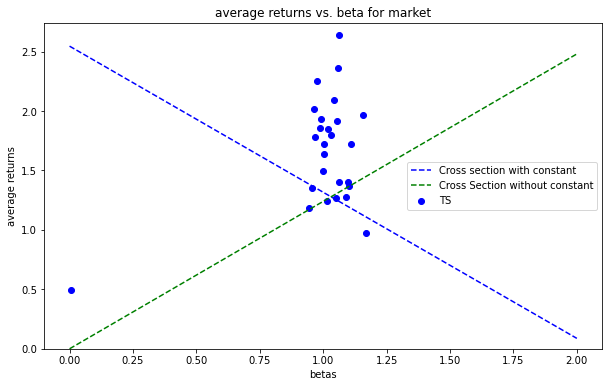

In [39]:
plt.figure(figsize=(10,6))

# Scatter Plot for Test Assets and Factors
plt.scatter(df1['beta mkt'], portfolio_26.mean(), c='b', label='TS')

# Plotting the Fitted Lines
x = np.linspace(0, 2, 100)
plt.ylim(bottom=0)

plt.plot(x,float(cross_with_constant_lambda_df['lambda_0_hat'])+float(cross_with_constant_lambda_df['lambda_mkt'])*x, 'b--', label='Cross section with constant')
plt.plot(x,float(cross_without_constant_lambda_df['lambda_mkt'])*x, 'g--', label='Cross Section without constant')


plt.xlabel('betas')
plt.ylabel('average returns')
plt.title('average returns vs. beta for market')
plt.legend()
plt.show()